عرض أول 5 سجلات:


,Patient_ID,Age,Gender,Symptom_1,Symptom_2,Symptom_3,Heart_Rate_bpm,Body_Temperature_C,Blood_Pressure_mmHg,Oxygen_Saturation_%,Diagnosis,Severity,Treatment_Plan
0,1,74,Male,Fatigue,Sore throat,Fever,69,39.4,132/91,94,Flu,Moderate,Medication and rest
1,2,66,Female,Sore throat,Fatigue,Cough,95,39.0,174/98,98,Healthy,Mild,Rest and fluids
2,3,32,Male,Body ache,Sore throat,Fatigue,77,36.8,136/60,96,Healthy,Mild,Rest and fluids
3,4,21,Female,Shortness of breath,Headache,Cough,72,38.9,147/82,99,Healthy,Mild,Rest and fluids
4,5,53,Male,Runny nose,Sore throat,Fatigue,100,36.6,109/106,92,Healthy,Mild,Rest and fluids



معلومات عن الأعمدة:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Patient_ID           2000 non-null   int64  
 1   Age                  2000 non-null   int64  
 2   Gender               2000 non-null   object 
 3   Symptom_1            2000 non-null   object 
 4   Symptom_2            2000 non-null   object 
 5   Symptom_3            2000 non-null   object 
 6   Heart_Rate_bpm       2000 non-null   int64  
 7   Body_Temperature_C   2000 non-null   float64
 8   Blood_Pressure_mmHg  2000 non-null   object 
 9   Oxygen_Saturation_%  2000 non-null   int64  
 10  Diagnosis            2000 non-null   object 
 11  Severity             2000 non-null   object 
 12  Treatment_Plan       2000 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 203.3+ KB
None

إحصائيات وصفية:
         Patient_ID          Age Gen

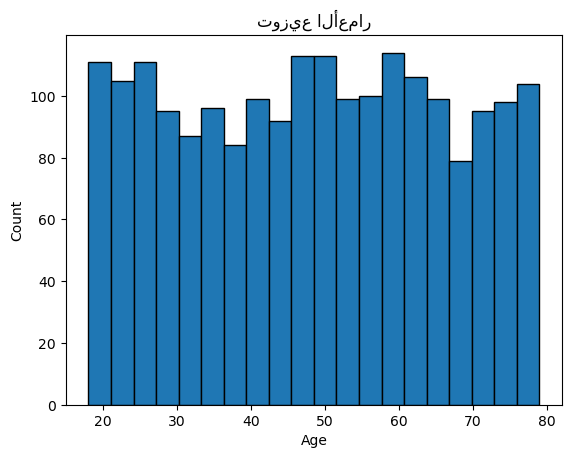


أعمدة البيانات بعد التحويل:
Index(['Age', 'Heart_Rate_bpm', 'Body_Temperature_C', 'Oxygen_Saturation_%',
       'Systolic', 'Diastolic', 'Gender_Female', 'Gender_Male',
       'Symptom_1_Body ache', 'Symptom_1_Cough', 'Symptom_1_Fatigue',
       'Symptom_1_Fever', 'Symptom_1_Headache', 'Symptom_1_Runny nose',
       'Symptom_1_Shortness of breath', 'Symptom_1_Sore throat',
       'Symptom_2_Body ache', 'Symptom_2_Cough', 'Symptom_2_Fatigue',
       'Symptom_2_Fever', 'Symptom_2_Headache', 'Symptom_2_Runny nose',
       'Symptom_2_Shortness of breath', 'Symptom_2_Sore throat',
       'Symptom_3_Body ache', 'Symptom_3_Cough', 'Symptom_3_Fatigue',
       'Symptom_3_Fever', 'Symptom_3_Headache', 'Symptom_3_Runny nose',
       'Symptom_3_Shortness of breath', 'Symptom_3_Sore throat',
       'Severity_Mild', 'Severity_Moderate', 'Severity_Severe'],
      dtype='object')

الدقة (Accuracy): 0.985

تقرير التصنيف:
              precision    recall  f1-score   support

  Bronchitis       0.91   

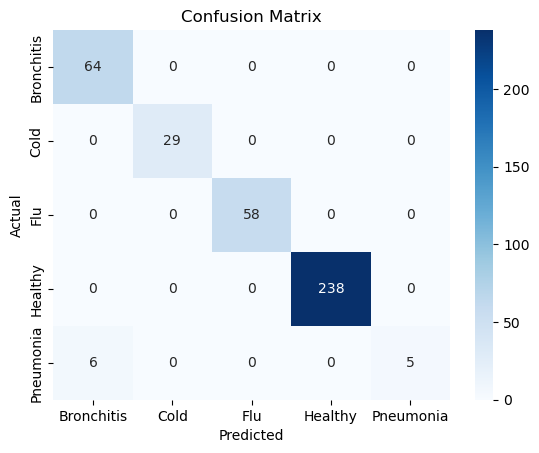

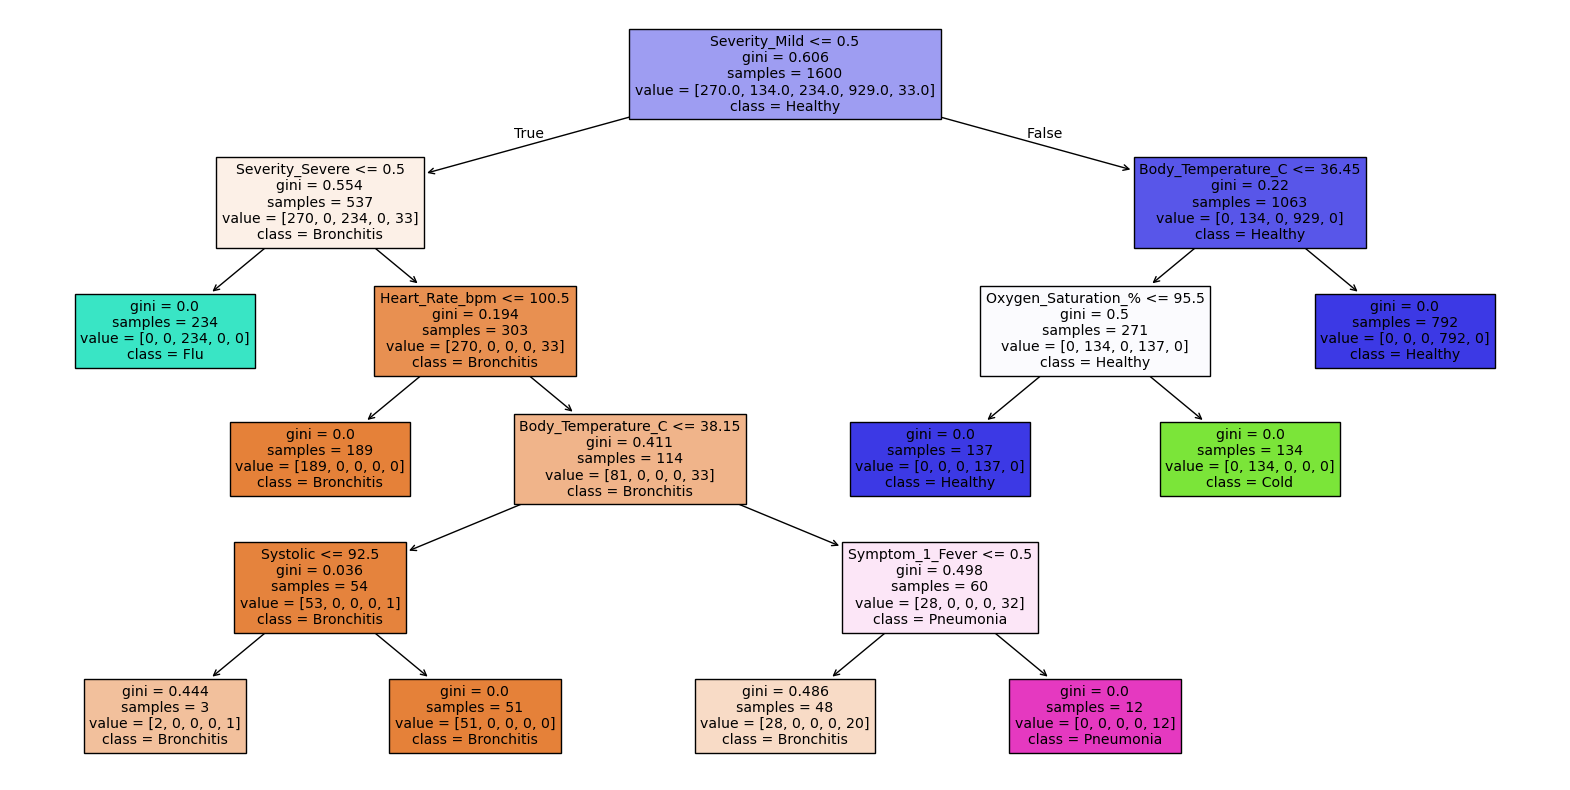

In [4]:
# ================================
# 1. تحميل المكتبات
# ================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ================================
# 2. قراءة البيانات
# ================================
df = pd.read_csv("C:/Users/mousa/Downloads/m/disease_diagnosis.csv")

# عرض أول 5 سجلات
print("عرض أول 5 سجلات:")
display(df.head())

# ================================
# 3. استكشاف البيانات
# ================================
print("\nمعلومات عن الأعمدة:")
print(df.info())

print("\nإحصائيات وصفية:")
print(df.describe(include='all'))

print("\nعدد السجلات لكل تشخيص:")
print(df['Diagnosis'].value_counts())

# رسم توزيع الأعمار
plt.hist(df['Age'], bins=20, edgecolor='black')
plt.title("توزيع الأعمار")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# ================================
# 4. تجهيز البيانات للتدريب
# ================================

# --- فصل ضغط الدم إلى عمودين ---
df[['Systolic', 'Diastolic']] = df['Blood_Pressure_mmHg'].str.split('/', expand=True).astype(int)

# حذف الأعمدة غير المهمة للتصنيف
X = df.drop(columns=['Patient_ID', 'Diagnosis', 'Treatment_Plan', 'Blood_Pressure_mmHg'])
y = df['Diagnosis']

# تحويل البيانات النصية (Gender, Symptom_1, Symptom_2, Symptom_3, Severity) إلى أرقام
X = pd.get_dummies(X)

print("\nأعمدة البيانات بعد التحويل:")
print(X.columns)

# تقسيم البيانات (تدريب 80% - اختبار 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================
# 5. تدريب Decision Tree
# ================================
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# ================================
# 6. التقييم
# ================================
y_pred = clf.predict(X_test)

print("\nالدقة (Accuracy):", accuracy_score(y_test, y_pred))
print("\nتقرير التصنيف:")
print(classification_report(y_test, y_pred))

# مصفوفة الارتباك
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ================================
# 7. رسم الشجرة
# ================================
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.show()



✅ Random Forest Results
الدقة (Accuracy): 0.99

تقرير التصنيف:
              precision    recall  f1-score   support

  Bronchitis       0.94      1.00      0.97        64
        Cold       1.00      1.00      1.00        29
         Flu       1.00      1.00      1.00        58
     Healthy       1.00      1.00      1.00       238
   Pneumonia       1.00      0.64      0.78        11

    accuracy                           0.99       400
   macro avg       0.99      0.93      0.95       400
weighted avg       0.99      0.99      0.99       400



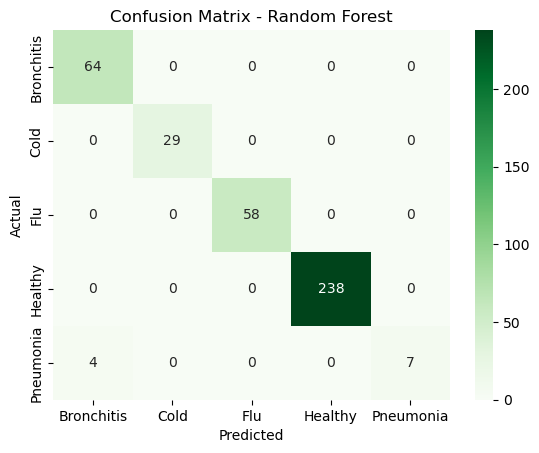

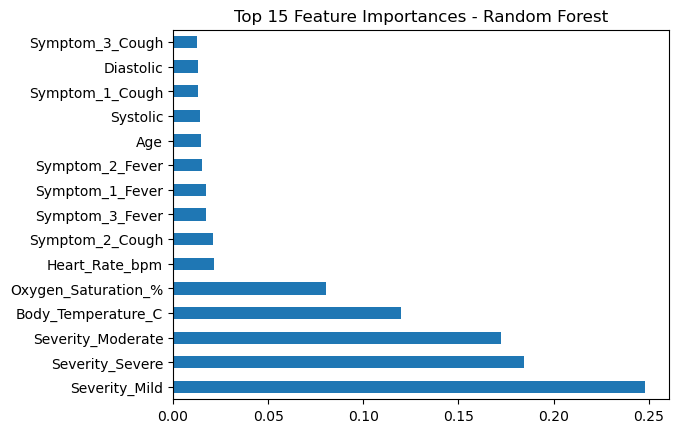

In [5]:
# ================================
# 8. تدريب Random Forest
# ================================
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)

# ================================
# 9. التقييم
# ================================
y_pred_rf = rf_clf.predict(X_test)

print("\n✅ Random Forest Results")
print("الدقة (Accuracy):", accuracy_score(y_test, y_pred_rf))
print("\nتقرير التصنيف:")
print(classification_report(y_test, y_pred_rf))

# مصفوفة الارتباك
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens",
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ================================
# 10. أهم الخصائص (Feature Importance)
# ================================
import numpy as np

feat_importances = pd.Series(rf_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()
